<a href="https://colab.research.google.com/github/steveding1/DA-learning/blob/master/Uber_funnel_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
csvurl = 'https://raw.githubusercontent.com/websovet/ds/master/Uber/data/dataset_1.csv'

In [ ]:
df = pd.read_csv(csvurl, parse_dates=['Date'])
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,2012-09-10,7,5,0,2,2,9
1,NaT,8,6,0,2,2,14
2,NaT,9,8,3,0,0,14
3,NaT,10,9,2,0,1,14
4,NaT,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,NaT,2,3,3,0,2,0
332,NaT,3,3,3,0,1,0
333,NaT,4,1,1,0,0,0
334,NaT,5,4,2,1,1,3


In [ ]:
df.fillna(method='ffill',inplace=True)
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,2012-09-10,7,5,0,2,2,9
1,2012-09-10,8,6,0,2,2,14
2,2012-09-10,9,8,3,0,0,14
3,2012-09-10,10,9,2,0,1,14
4,2012-09-10,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0
332,2012-09-24,3,3,3,0,1,0
333,2012-09-24,4,1,1,0,0,0
334,2012-09-24,5,4,2,1,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              336 non-null    datetime64[ns]
 1   Time (Local)      336 non-null    int64         
 2   Eyeballs          336 non-null    int64         
 3   Zeroes            336 non-null    int64         
 4   Completed Trips   336 non-null    int64         
 5   Requests          336 non-null    int64         
 6   Unique Drivers    336 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 18.5 KB


In [ ]:
len(df.Date.unique())
# There are 15 days

15

In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs', 'Zeroes', 'Completed Trips',
       'Requests', 'Unique Drivers'],
      dtype='object')

In [ ]:
#	vs Zeroes	Completed Trips	Requests	Unique Drivers
df['Weekday'] = df['Date'].dt.weekday
df['Wkdayname'] = df['Date'].dt.day_name()
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Weekday,Wkdayname
0,2012-09-10,7,5,0,2,2,9,0,Monday
1,2012-09-10,8,6,0,2,2,14,0,Monday
2,2012-09-10,9,8,3,0,0,14,0,Monday
3,2012-09-10,10,9,2,0,1,14,0,Monday
4,2012-09-10,11,11,1,4,4,11,0,Monday
...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,0,Monday
332,2012-09-24,3,3,3,0,1,0,0,Monday
333,2012-09-24,4,1,1,0,0,0,0,Monday
334,2012-09-24,5,4,2,1,1,3,0,Monday


In [ ]:
df[df['Date']=='2012-09-24']
#df[df['Date']=='2012-09-10']
# only 0-6 Hour records for the last day
# no 0-6 Hour records for the first day

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Weekday,Wkdayname
329,2012-09-24,0,7,2,1,2,2,0,Monday
330,2012-09-24,1,7,7,0,0,0,0,Monday
331,2012-09-24,2,3,3,0,2,0,0,Monday
332,2012-09-24,3,3,3,0,1,0,0,Monday
333,2012-09-24,4,1,1,0,0,0,0,Monday
334,2012-09-24,5,4,2,1,1,3,0,Monday
335,2012-09-24,6,9,1,2,2,7,0,Monday


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


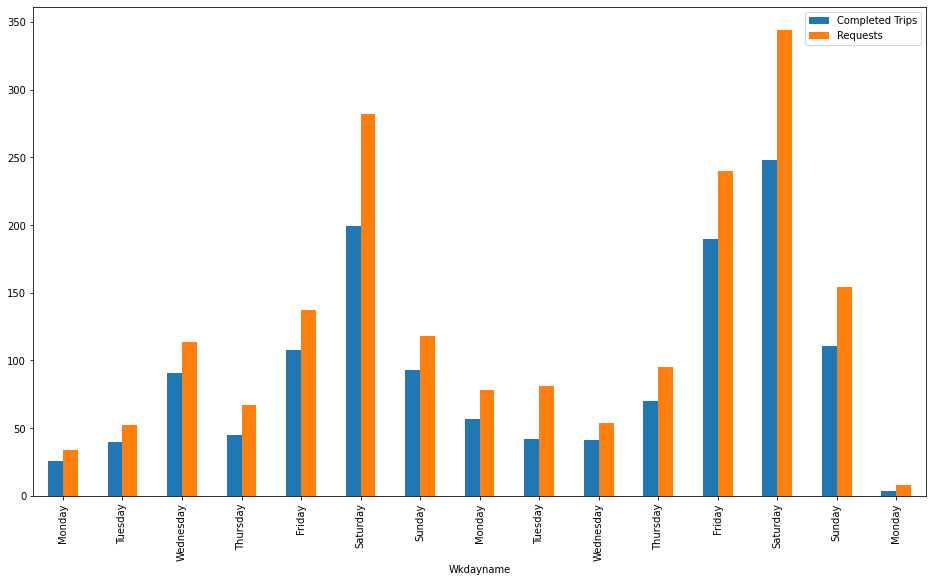

In [ ]:
# have a look with weekday situations
df1 = df.groupby(by='Date')['Completed Trips','Requests'].sum()
df1['Wkdayname'] = df1.index.day_name()
df1.plot.bar(x='Wkdayname',y=['Completed Trips','Requests'],figsize=(16,9))
# Fri/Sat are the busiest

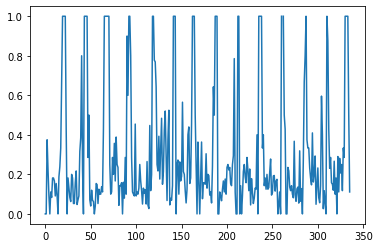

In [ ]:
#Eyeballs	vs Zeroes
(df["Zeroes"]/df["Eyeballs"]).plot()
#the plot shows a repetitive daily for Zeroes/Eyeballs reach to 100%

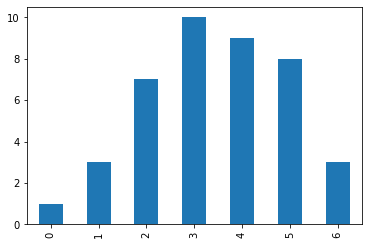

In [ ]:
#see those hours
df[df["Zeroes"]/df["Eyeballs"]==1]['Time (Local)'].value_counts().sort_index().plot(kind='bar')
# all of those happend from 0 to 6 o'clock. 3 and 4 are maxium

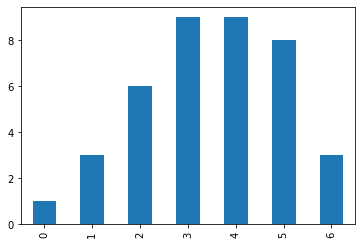

In [ ]:
#View the statisic of Unique Drivers == 0
df[df["Unique Drivers"]==0]['Time (Local)'].value_counts().sort_index().plot(kind='bar')
#this very cope with the previous plot - all "Eyeballs" turned "Zeroes(saw no driver)". 
#We find a problem, which is no driver supply in early morning.

In [ ]:
#Eyeballs	vs Requests
df.Eyeballs.corr(df.Requests)

0.897362347377218

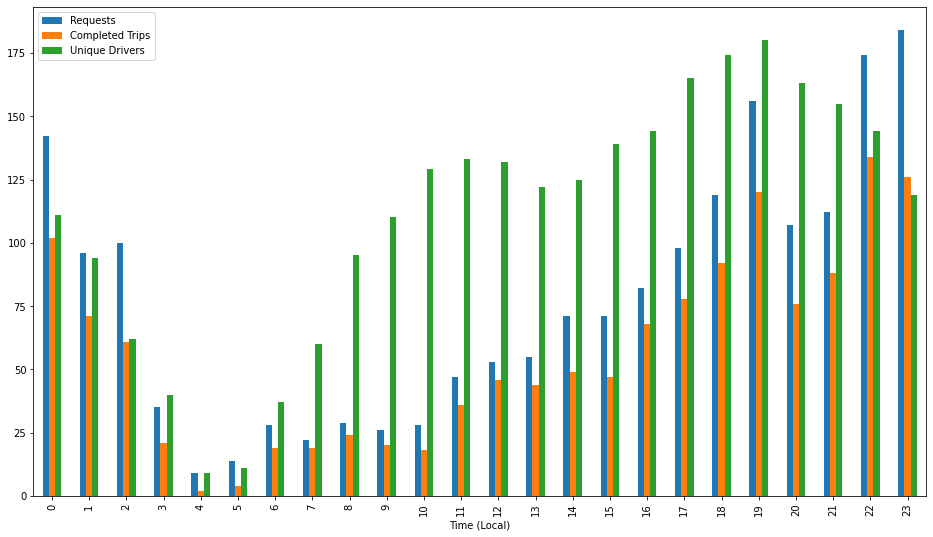

In [ ]:
#Requests	vs Completed Trips vs Unique Drivers
rcu = df.groupby(by='Time (Local)')[['Requests','Completed Trips','Unique Drivers']].apply(sum)
rcu.plot(kind='bar', figsize=(16,9))
#request is low from 4 and keep increasing to 19, 22/23 was the peak of a day, then decreases until 4.
#relative 2x drivers comparing to requests from Hour 7-13. High demanding (>0.9) in driver in Hour 19 / 22-5

In [40]:
df1 = df[df['Date']!='2012-09-24'][['Date','Time (Local)','Eyeballs','Requests','Unique Drivers']]
df1

,Date,Time (Local),Eyeballs,Requests,Unique Drivers
0,2012-09-10,7,5,2,9
1,2012-09-10,8,6,2,14
2,2012-09-10,9,8,0,14
3,2012-09-10,10,9,1,14
4,2012-09-10,11,11,4,11
...,...,...,...,...,...
324,2012-09-23,19,32,6,11
325,2012-09-23,20,29,3,7
326,2012-09-23,21,24,4,5
327,2012-09-23,22,17,2,6


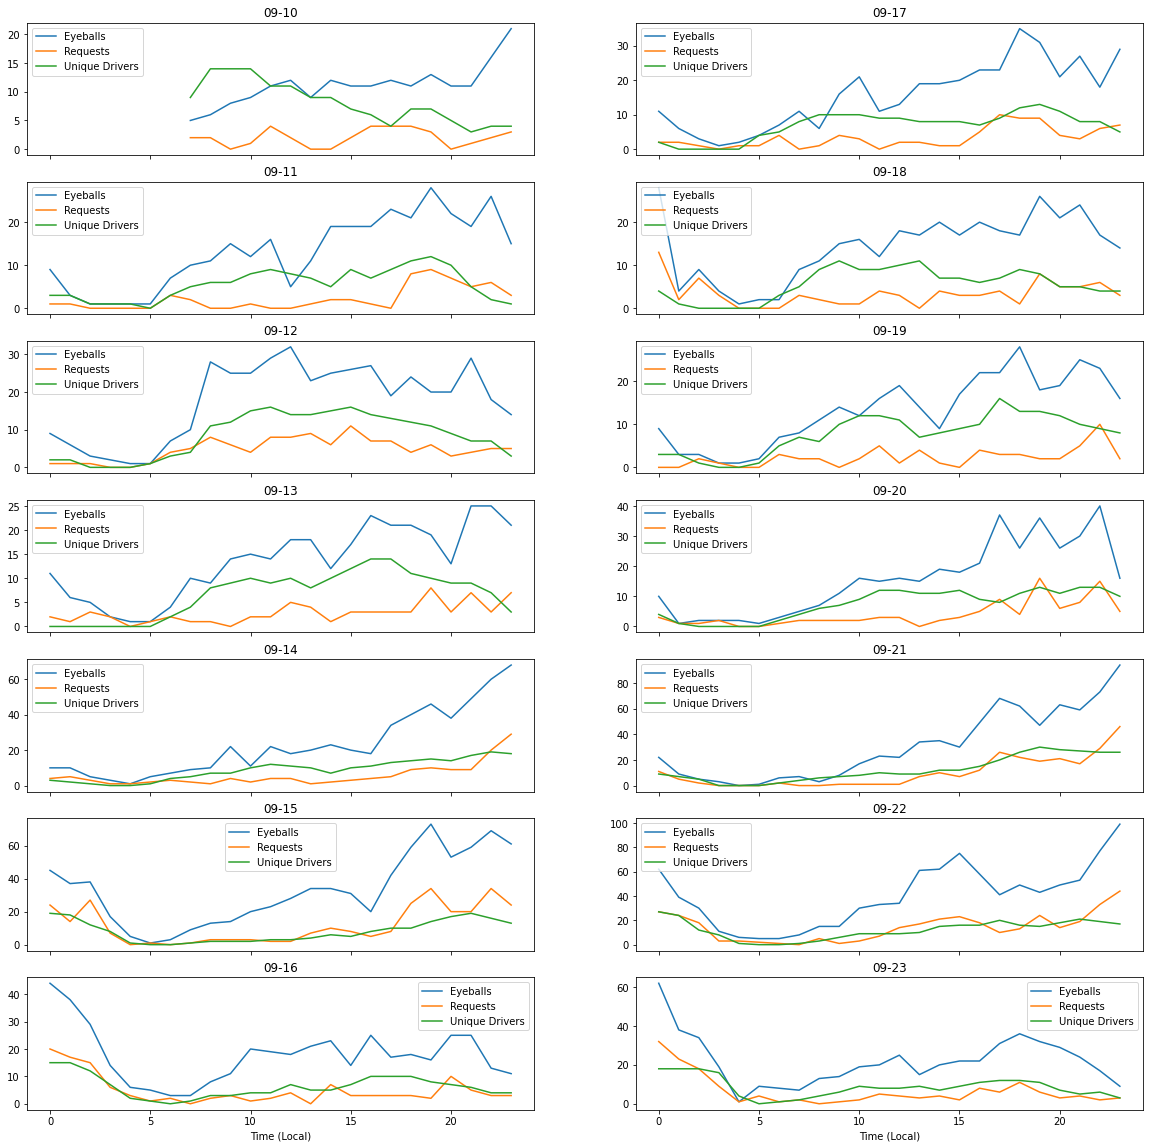

In [41]:
#Plot Demand vs Supply (Eyeballs vs Drivers) for each day - 2 weeks(Monday to Sunday) excluded 09-24(Monday)
fig, axes = plt.subplots(7,2, sharex=True, figsize=(20, 20))
#ax.set_xticks(df['Wkdayname'].unique())
for i,mydate in enumerate(df1['Date'].unique()):
  dftemp = df1[df1['Date']==mydate]
  ax = axes[i%7,i//7]
  dftemp.plot('Time (Local)', ['Eyeballs','Requests','Unique Drivers'], kind='line', ax=ax)#,'Unique Drivers'
  ax.title.set_text(mydate.astype(str)[5:10])
plt.show()

The core concept of the business is about the optimization between demand(Eyeballs) and supply(Unique Drivers). So we are going to explore the pattern of gap (Eyeballs - Unique.Drivers) by date and time. It is clearly that there are still lots of positive bars, especially in Friday night and Saturday.

Incentive plans or marketing campaigns shall focus on the how to reduce Zeros during Popular Hours.

Dynamic pricing on riders might decrease Eyeballs during Popular Hours.
Therefore, if I were about to make a suggestion, I will go for a dynamic pricing on drivers’ proportion of revenue share, rather than on riders.